<a href="https://colab.research.google.com/github/Sosat-pixel/Aprendizaje-supervisado---Clasificacion-con-K-NN/blob/main/Clasificaci%C3%B3n_C%C3%A1ncer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizaje supervisado - Clasificación con K-NN

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Información adicional.
`df['diagnosis'].replace({'B': 0, 'M': 1})`

/tmp/ipython-input-3806054434.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})


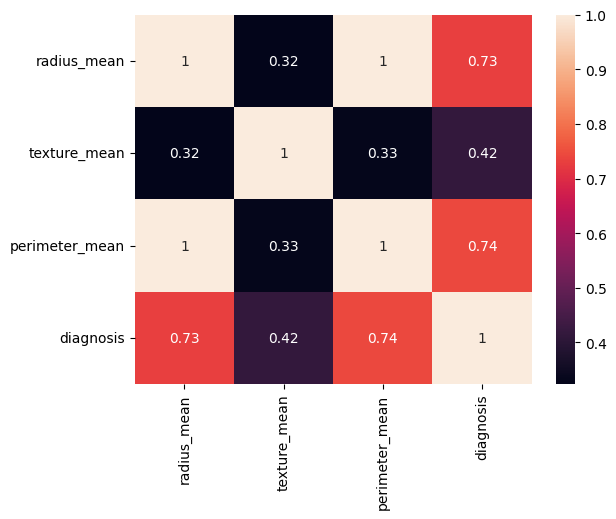

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

cols = ['radius_mean','texture_mean','perimeter_mean','diagnosis']


sns.heatmap(df[cols].corr(), annot=True)
plt.show()

In [25]:
X = df[['radius_mean','texture_mean','perimeter_mean']]
Y = df[['diagnosis']]

scaler = StandardScaler()

Xscaled = scaler.fit_transform(X)

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(Xscaled, Y)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [35]:
#Donde se encuentran las XX ingrese los valores a utilizar, siendo el primero el radio, textura, perímetro de las células.
input = [[11.52,18.75,73.34]]
inputScler = scaler.transform(input)
output = kn.predict(inputScler)
print("El resultado del tipo de cancer posible es: ", output[0])

El resultado del tipo de cancer posible es:  0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


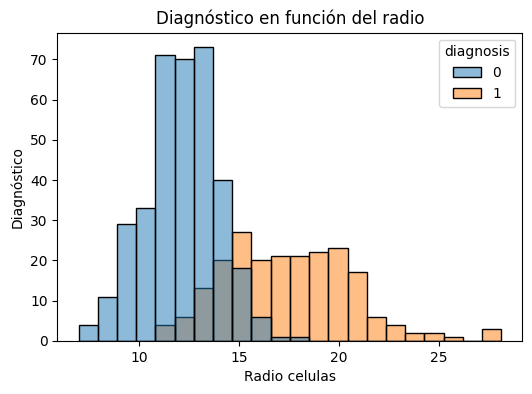

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="radius_mean",hue="diagnosis")
plt.title("Diagnóstico en función del radio")
plt.xlabel("Radio celulas")
plt.ylabel("Diagnóstico")
plt.show()

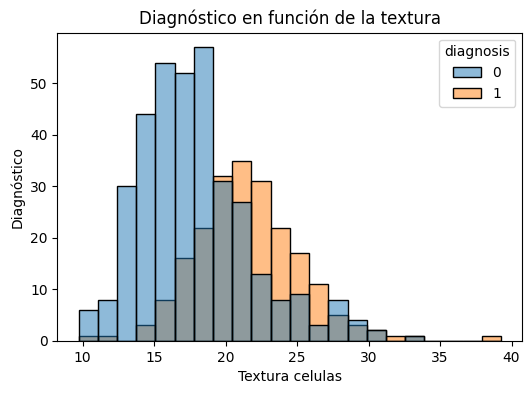

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="texture_mean",hue="diagnosis")
plt.title("Diagnóstico en función de la textura")
plt.xlabel("Textura celulas")
plt.ylabel("Diagnóstico")
plt.show()

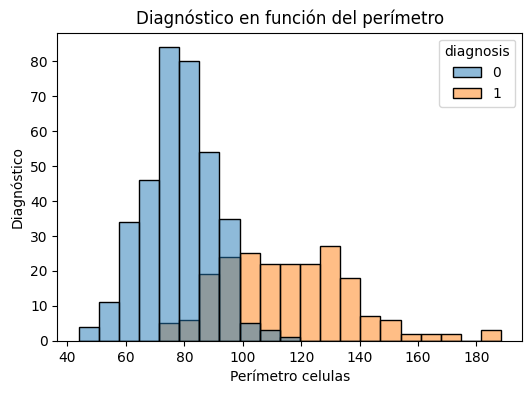

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="perimeter_mean",hue="diagnosis")
plt.title("Diagnóstico en función del perímetro")
plt.xlabel("Perímetro celulas")
plt.ylabel("Diagnóstico")
plt.show()

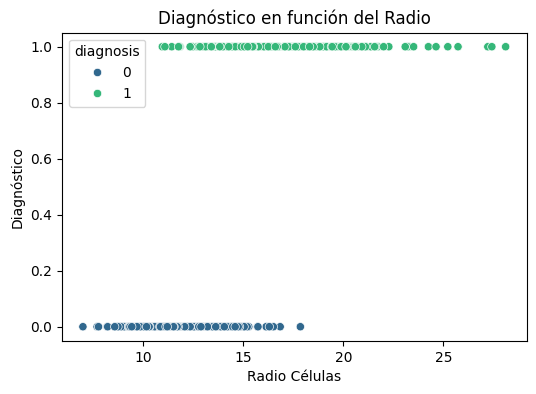

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="radius_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Diagnóstico en función del Radio")
plt.xlabel("Radio Células")
plt.ylabel("Diagnóstico")
plt.show()

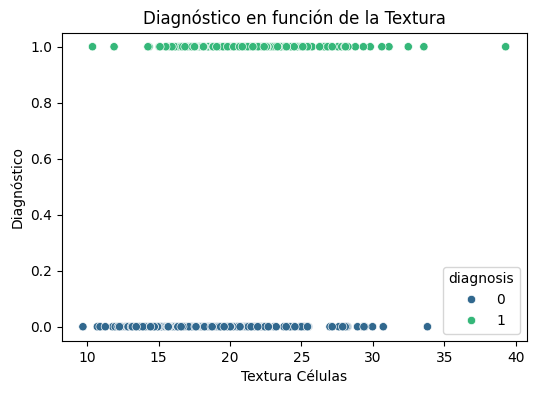

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="texture_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Diagnóstico en función de la Textura")
plt.xlabel("Textura Células")
plt.ylabel("Diagnóstico")
plt.show()

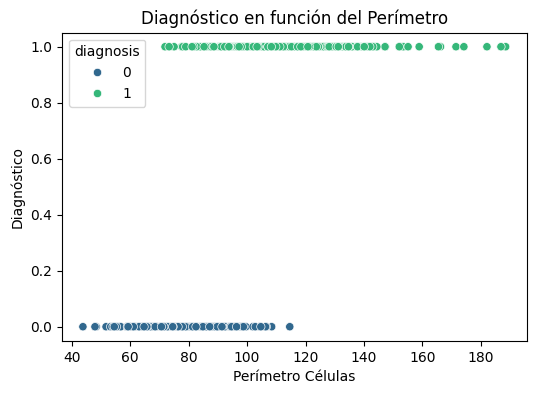

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="perimeter_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Diagnóstico en función del Perímetro")
plt.xlabel("Perímetro Células")
plt.ylabel("Diagnóstico")
plt.show()